<center><h1>DESTINASI WISATA TERPOPULER DI SRI LANKA</h1>

<h3>10121091 – MUHAMMAD RIDWAN SETIAWAN (KONTRIBUSI) <br>
    10121123 – TAUFIQUR ROHMAN (KONTRIBUSI) <br>
    10121114 – QAISHA FADHIL AHMAD (KONTRIBUSI) <br>
    10121106 – MUHAMMAD SYIHAB (KONTRIBUSI) <br>
    10121107 – IRHAM AHMAD MUSYADAD (KONTRIBUSI) <br>
</h3>

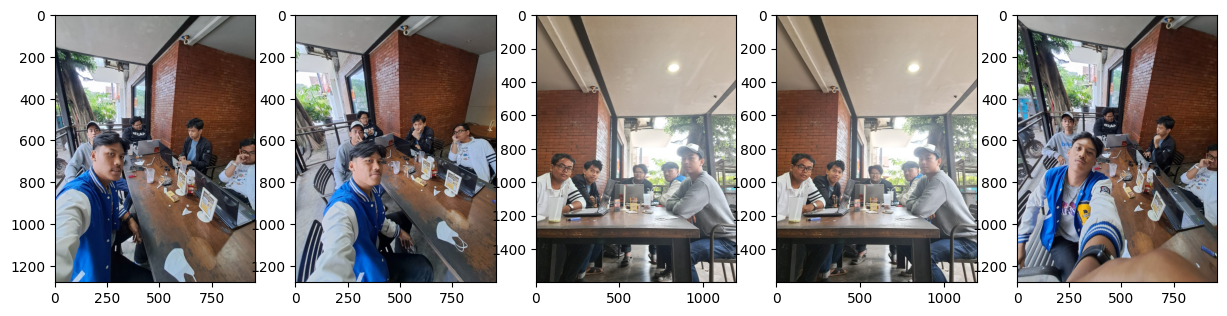

In [2]:
# foto
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15,5))
ax[0].imshow(plt.imread('img/1.jpg'))
ax[1].imshow(plt.imread('img/2.jpg'))
ax[2].imshow(plt.imread('img/3.jpg'))
ax[3].imshow(plt.imread('img/4.jpg'))
ax[4].imshow(plt.imread('img/5.jpg'))
plt.show()

<h3>
    Latar Belakang dan Tujuan <br>
    Latar Belakang : <br>
    Sri Lanka adalah sebuah negara kecil di Asia Selatan yang memiliki banyak sejarah dan budaya yang kaya. Negara ini memiliki pantai indah, pegunungan yang indah, tempat-tempat suci dan situs-situs sejarah, yang semuanya membuat Sri Lanka menjadi salah satu destinasi wisata terpopuler di dunia. <br>
</h3>
<h3>
    Tujuan : <br>
    Memberikan informasi tentang destinasi wisata populer dan tempat menarik di Sri Lanka, seperti rincian nama, alamat dan peta.
    <br>
    Membantu wisatawan untuk menemukan tempat-tempat baru dan menyediakan informasi tambahan seperti restoran dan tempat belanja yang dapat memperkaya pengalaman wisata mereka.
</h3>

In [3]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import folium
from matplotlib.pyplot import plot
from folium.plugins import FastMarkerCluster

In [4]:
data = pd.read_csv('complete_travel_destination_data.csv')

In [5]:
data.head()

,Type,Name,Address,Grade,District,AGA Division,PS/MC/UC,Full_Add,Lat,Lon
0,Restaurants,BAVARIAN BARN RESTAURANT,"NO. 11, GALLE FACE COURT 02 COLOMBO",A,Colombo,Colombo,Colombo Divisional Secretariat,"NO. 11, GALLE FACE COURT 02 COLOMBO, Colombo, ...",80.016670,6.866670
1,Restaurants,LORDS RESTAURANT,80B PORUTHOTA ROAD ETTHUKALA NEGOMBO,A,Gampaha,Negombo,Negombo Divisional Secretariat,"80B PORUTHOTA ROAD ETTHUKALA NEGOMBO, Gampaha,...",79.843249,7.206416
2,Restaurants,NIHONBASHI RESTAURANT,"NO 11, GALLE FACE TERRACE, COLOMBO 03",A,Colombo,Colombo,Colombo Divisional Secretariat,"NO 11, GALLE FACE TERRACE, COLOMBO 03, Colombo...",80.016670,6.866670
3,Restaurants,FREE WIND RESTAURANT & BAR,"NO 1285, KANDY ROAD, PALAIYOOTHU, TRINCO MALEE",A,Trincomalee,Uppuveli Trinco Malee,Trincomalee Divisional Secretariat,"NO 1285, KANDY ROAD, PALAIYOOTHU, TRINCO MALEE...",80.750000,7.250000
4,Restaurants,EDWIN RESTAURANT,"204, LEWIS PLACE, NEGOMBO",B,Gampaha,Negombo,Negombo Divisional Secretariat,"204, LEWIS PLACE, NEGOMBO, Gampaha, Sri Lanka",79.843249,7.206416


In [6]:
# Cek dataset status 
data.describe()

,Lat,Lon
count,1518.000000,1518.000000
mean,80.043295,7.009534
std,2.153123,1.285658
min,-2.781457,5.964618
25%,79.898096,6.866670
50%,80.016670,6.866670
75%,80.016670,7.031163
max,81.849686,53.954905


In [7]:
# Cek data null 
data.isnull().sum()

Type               0
Name               0
Address            0
Grade           1047
District           1
AGA Division       1
PS/MC/UC           1
Full_Add           1
Lat                5
Lon                5
dtype: int64

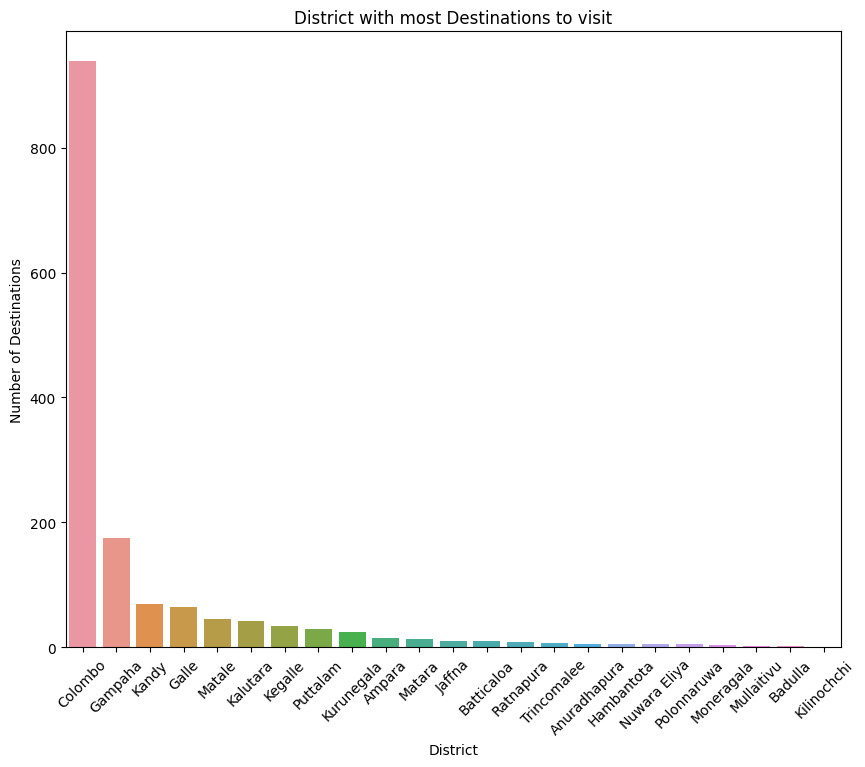

In [8]:
top_d_type = data[["Address", "District"]].groupby("District").agg(['count'])['Address']['count'].sort_values(ascending=False)
ax = sns.barplot( x = top_d_type.index, y = top_d_type.values)
ax.set_xticklabels(labels=top_d_type.index , rotation=45)
fig = plt.gcf()
fig.set_size_inches(10, 8, forward=True)
ax.set_ylabel("Number of Destinations")
ax.set_xlabel("District")
ax.set_title("District with most Destinations to visit");

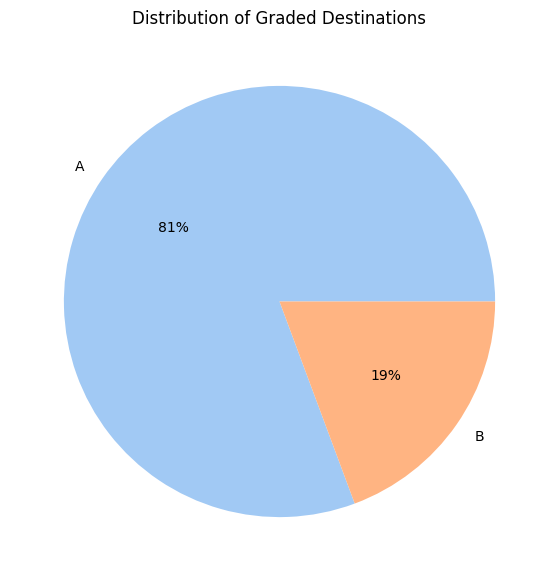

In [9]:
# Distribusi Destinasi Bertingkat
colors = sns.color_palette('pastel')[0:5]
dstb_grade = data[["Address", "Grade"]].groupby("Grade").agg(['count'])['Address']['count']
plt.pie(dstb_grade, labels = dstb_grade.index, colors = colors, autopct='%.0f%%')
fig = plt.gcf()
fig.set_size_inches(20, 7, forward=True)
plt.title("Distribution of Graded Destinations")
plt.show()

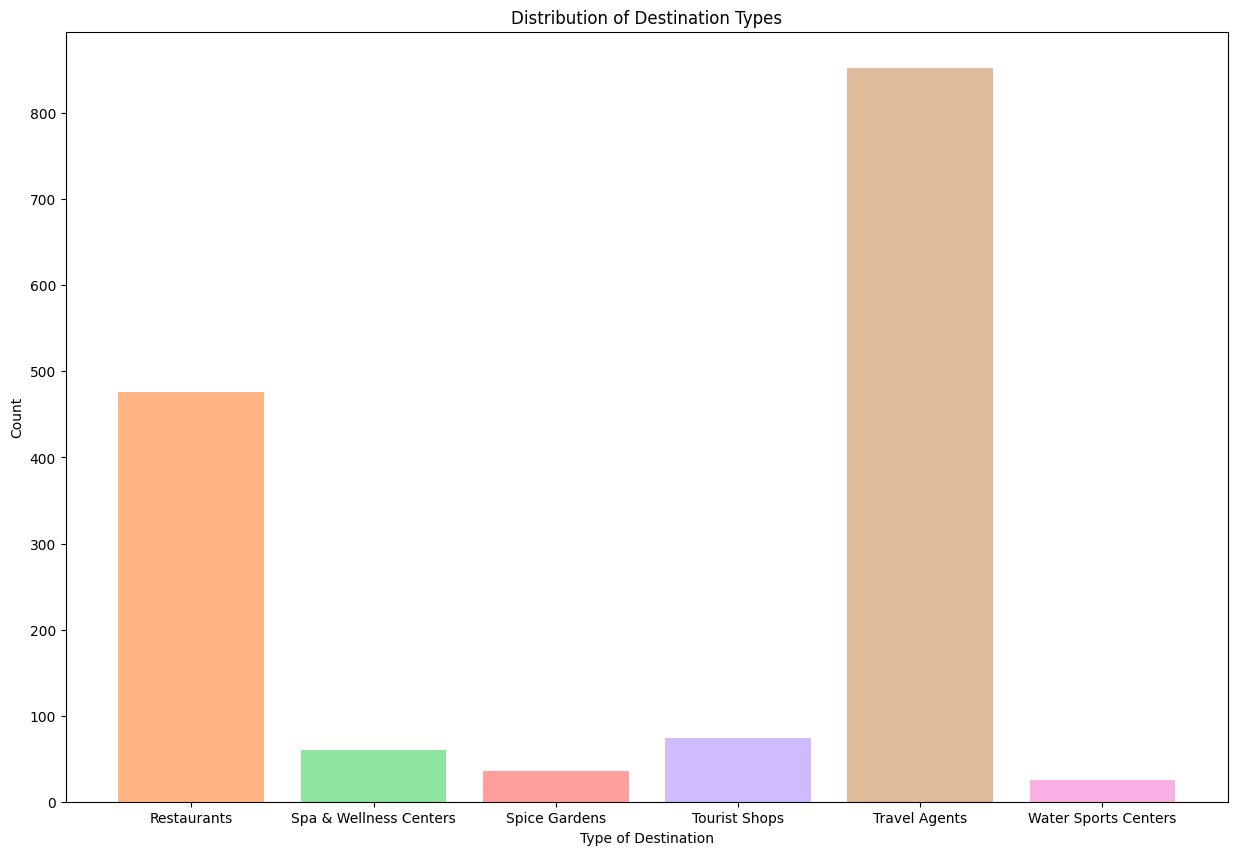

In [10]:
# Tipe District Destination 
colors = sns.color_palette('pastel')[1:7]
dtc_dest = data[["Address", "Type"]].groupby("Type").agg(['count'])['Address']['count']

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(dtc_dest.index, dtc_dest.values, color = colors)
ax.set_title("Distribution of Destination Types")
ax.set_xlabel("Type of Destination")
ax.set_ylabel("Count")
plt.show()

In [11]:
# Visual Destination Geo Map 

folium_map = folium.Map(location=[7.8731, 80.7718],
                        zoom_start=8,
                        tiles='CartoDB dark_matter')

data_map = data[data['Lat'].notna() & data['Lon'].notna() ]

FastMarkerCluster(data=list(zip(data_map['Lon'].values, data_map['Lat'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

In [12]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

import pandas as pd
import numpy as np

data = pd.read_csv('complete_travel_destination_data.csv')
data_filter = data[['Type', 'Name','Lon', 'Lat']]
data_filter

,Type,Name,Lon,Lat
0,Restaurants,BAVARIAN BARN RESTAURANT,6.866670,80.016670
1,Restaurants,LORDS RESTAURANT,7.206416,79.843249
2,Restaurants,NIHONBASHI RESTAURANT,6.866670,80.016670
3,Restaurants,FREE WIND RESTAURANT & BAR,7.250000,80.750000
4,Restaurants,EDWIN RESTAURANT,7.206416,79.843249
...,...,...,...,...
1518,Water Sports Centers,BORDERLANDS LANKA,6.997873,80.408493
1519,Water Sports Centers,SUNSET ARALIYA WATER SPORTS,6.432649,79.998899
1520,Water Sports Centers,SRI LANKA DIVING TOURS,7.252517,79.847890
1521,Water Sports Centers,MIRISSA WATERSPORTS (PVT) LTD,6.253610,80.298060


In [13]:
print(data_filter.isna().sum().sum())

10


In [14]:
data_filter = data_filter.dropna()

In [15]:
print(data_filter.isna().sum().sum())

0


In [16]:
#Modul Untuk Machine Learning
from sklearn.preprocessing  import LabelEncoder

le = LabelEncoder()
data_filter.loc[:, 'id_Type'] = le.fit_transform(data_filter['Type'])

#Memulai Pembuatan Peta
boulder_coords = [7.8731, 80.7718] #Mendefinisikan center pada maps
my_map = folium.Map(location=boulder_coords, tiles = 'Stamen Terrain', zoom_start = 11)

for i in range (0, len(data_filter)):
    koordinat = data_filter.iloc[i, [2,3]].to_list()
    nama = data_filter.iloc[i, [1]].astype(str).to_string()
    if(data_filter.iloc[i,4]==0):
        folium.Marker(koordinat, popup = nama,icon=folium.Icon(color='black')).add_to(my_map)
    elif(data_filter.iloc[i,4]==1):
        folium.Marker(koordinat, popup = nama,icon=folium.Icon(color='pink')).add_to(my_map)
    elif(data_filter.iloc[i,4]==2):
        folium.Marker(koordinat, popup = nama,icon=folium.Icon(color='darkblue')).add_to(my_map)
    elif(data_filter.iloc[i,4]==3):
        folium.Marker(koordinat, popup = nama,icon=folium.Icon(color='green')).add_to(my_map)
    elif(data_filter.iloc[i,4]==4):
        folium.Marker(koordinat, popup = nama,icon=folium.Icon(color='cadetblue')).add_to(my_map)
    elif(data_filter.iloc[i,4]==5):
        folium.Marker(koordinat, popup = nama,icon=folium.Icon(color='gray')).add_to(my_map)
        

my_map

C:\Users\Irham Ahmad M\AppData\Local\Temp\ipykernel_10576\3358642936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter.loc[:, 'id_Type'] = le.fit_transform(data_filter['Type'])


In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv('output.csv')
data_filter = data[['Country', '2020']]
data_filter

,Country,2020
0,India,89357.0
1,United Kingdom,55455.0
2,Russia,49397.0
3,Germany,34507.0
4,China[14],26147.0
5,France,24838.0
6,Australia,20283.0
7,United States,16842.0
8,Ukraine,16776.0
9,Canada,12436.0


In [18]:
print(data_filter.isna().sum().sum())

2


In [19]:
data_filter = data_filter.dropna()

In [20]:
print(data_filter.isna().sum().sum())

0


In [21]:
data_filter

,Country,2020
0,India,89357.0
1,United Kingdom,55455.0
2,Russia,49397.0
3,Germany,34507.0
4,China[14],26147.0
5,France,24838.0
6,Australia,20283.0
7,United States,16842.0
8,Ukraine,16776.0
9,Canada,12436.0


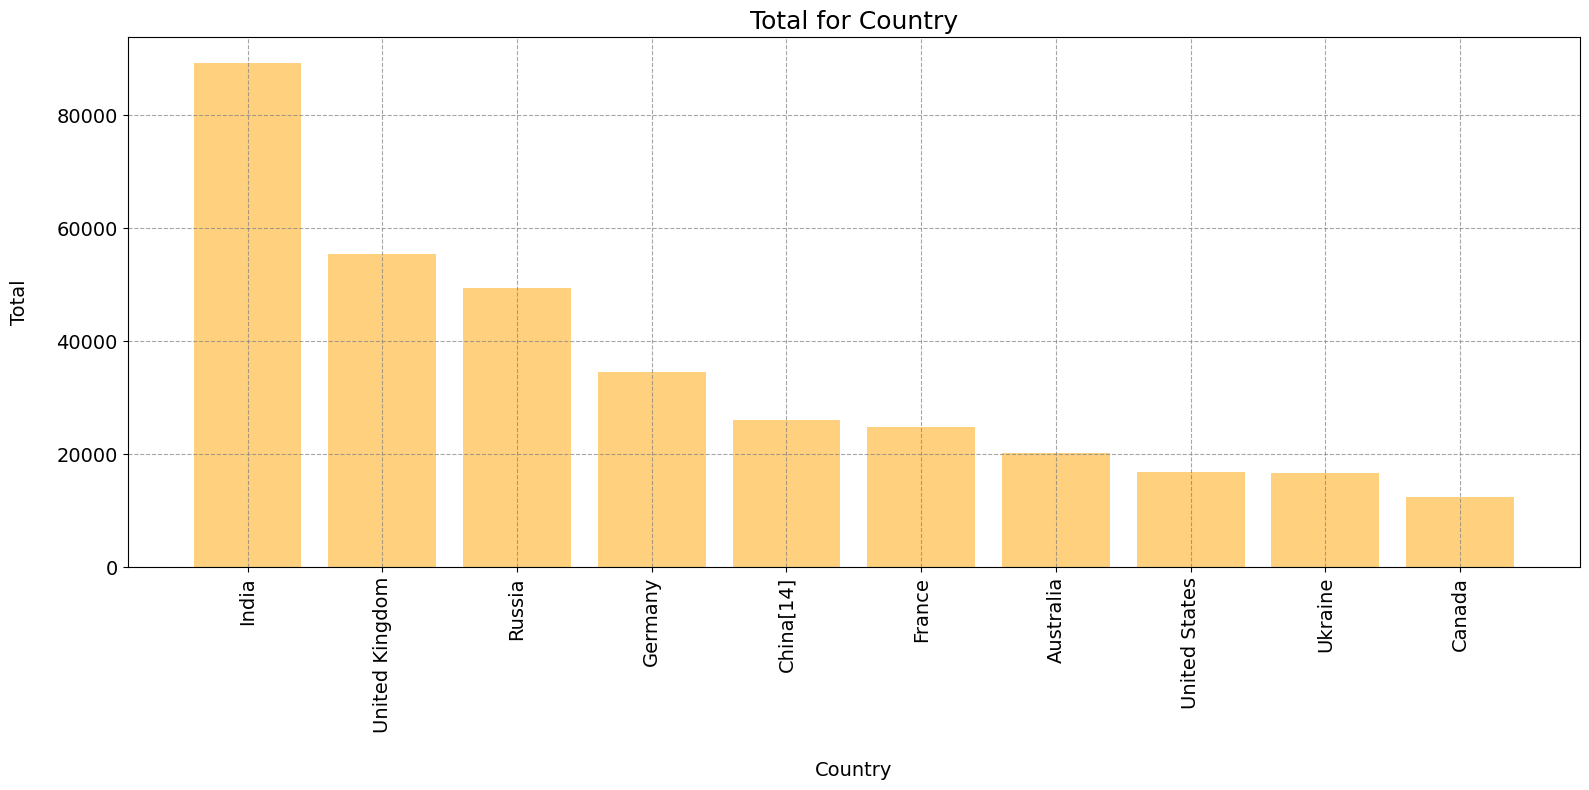

In [22]:
# Visualisasi dengan bar plot

plt.figure(figsize=(16,8))
plt.bar(data_filter['Country'], data_filter['2020'], color='orange', alpha=0.5)


plt.title('Total for Country', size=18)
plt.xlabel('\nCountry', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14, rotation=90)
plt.yticks(size=14)
plt.grid(linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()


plt.show()